# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In [11]:
library("tidyverse")

In [12]:
nhl_roster= read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-01-09/nhl_rosters.csv")

Rows: 54883 Columns: 18
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (10): team_code, position_type, headshot, first_name, last_name, positi...
dbl   (7): season, player_id, sweater_number, height_in_inches, weight_in_po...
date  (1): birth_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [13]:
nhl_roster |> head()

team_code,season,position_type,player_id,headshot,first_name,last_name,sweater_number,position_code,shoots_catches,height_in_inches,weight_in_pounds,height_in_centimeters,weight_in_kilograms,birth_date,birth_city,birth_country,birth_state_province
<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>,<chr>,<chr>
ATL,19992000,forwards,8467867,https://assets.nhle.com/mugs/nhl/19992000/ATL/8467867.png,Bryan,Adams,26,L,L,72,185,183,84,1977-03-20,Fort St. James,CAN,British Columbia
ATL,19992000,forwards,8445176,https://assets.nhle.com/mugs/nhl/19992000/ATL/8445176.png,Donald,Audette,28,R,R,68,191,173,87,1969-09-23,Laval,CAN,Quebec
ATL,19992000,forwards,8460014,https://assets.nhle.com/mugs/nhl/19992000/ATL/8460014.png,Eric,Bertrand,83,L,L,73,205,185,93,1975-04-16,St-Ephrem,CAN,Quebec
ATL,19992000,forwards,8460510,https://assets.nhle.com/mugs/nhl/19992000/ATL/8460510.png,Jason,Botterill,28,L,L,76,217,193,98,1976-05-19,Edmonton,CAN,Alberta
ATL,19992000,forwards,8459596,https://assets.nhle.com/mugs/nhl/19992000/ATL/8459596.png,Andrew,Brunette,15,L,L,73,215,185,98,1973-08-24,Sudbury,CAN,Ontario
ATL,19992000,forwards,8445733,https://assets.nhle.com/mugs/nhl/19992000/ATL/8445733.png,Kelly,Buchberger,7,R,L,74,200,188,91,1966-12-02,Langenburg,CAN,Saskatchewan


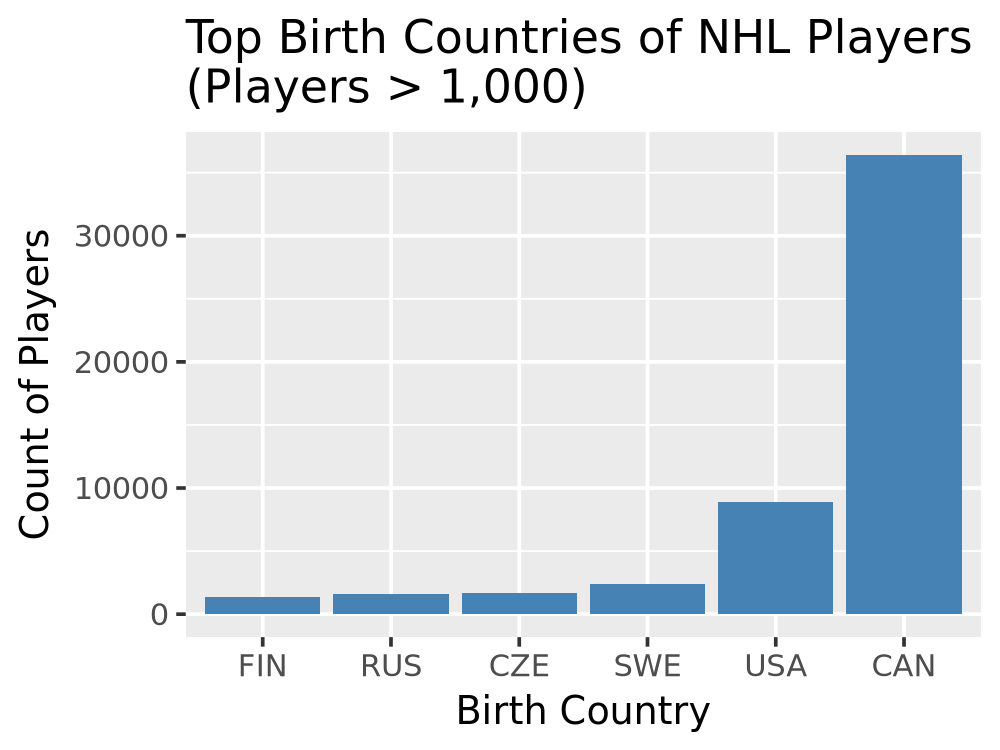

In [14]:
options(repr.plot.width = 4, repr.plot.height = 3)
nhl_roster |> count(birth_country) |> filter(n>1000) |> 
    mutate(birth_country = fct_reorder(birth_country, n)) |>
    ggplot(aes(x=birth_country, y=n)) + geom_col(fill='steelblue') + 
    labs(x = "Birth Country", y = "Count of Players") +
    ggtitle("Top Birth Countries of NHL Players \n(Players > 1,000)")

I wanted to examine the number of NHL players from each birth country and chose to focus on  the countries that had more than 1,000 players to make the visualization relevant and readable. To do this, I used functions from the dplyr package to count the occurrences of each value in the  "birth_country" column and filtered the data to only include the countries with more than 1,000 players. Next, I used the forcats package to reorder the "birth_country" column according to the count of players per country. This way, the bars in the bar chart would be ordered from least to most players. Finally, I created the bar chart, customized the color of the bars to be blue, and added titles for the axes and overall chart. This bar chart shows that the majority of NHL players, over 30,000, were born in Canada. The  USA follows Canada with the second-highest number of players, although there is a gap of more than 20,000 players. Sweden, the Czech Republic, Russia, and Finland have the next highest number of players respectively, each with fewer than 5,000. 

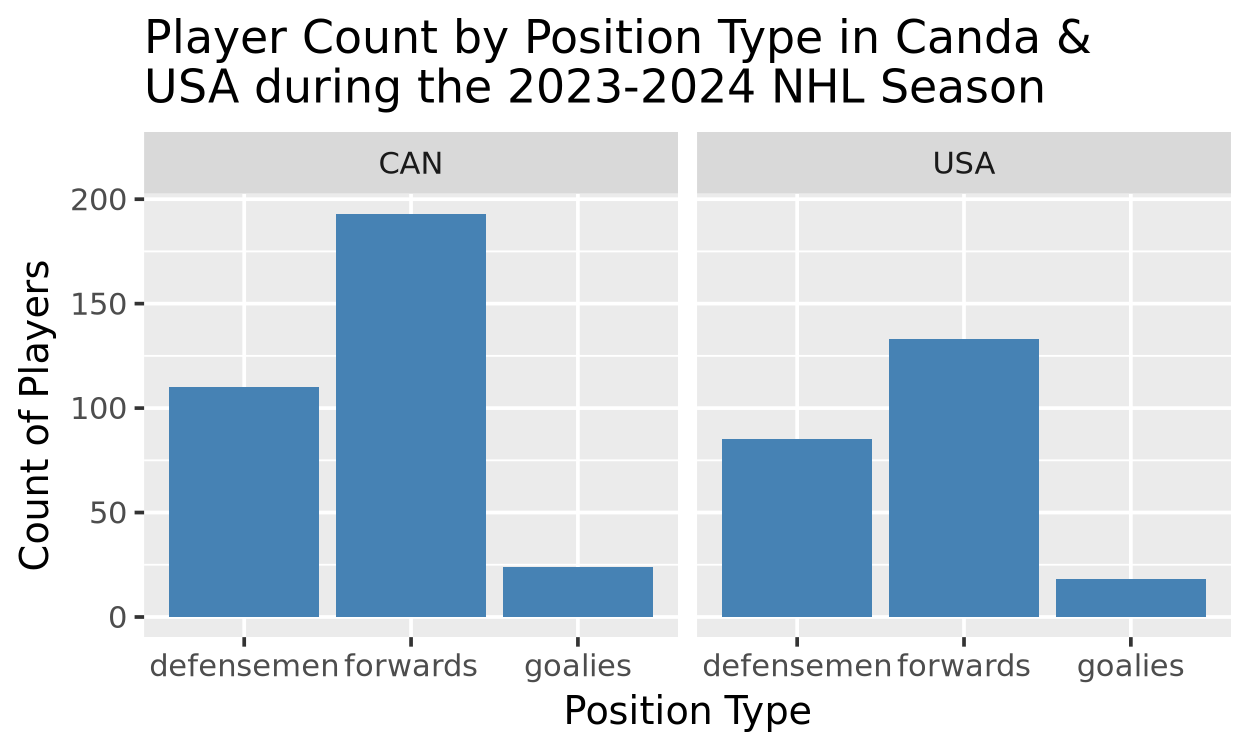

In [15]:
options(repr.plot.width = 5, repr.plot.height = 3)
nhl_roster |> filter(season==20232024) |> filter(birth_country %in% c("USA", "CAN")) |> 
    group_by(birth_country, position_type) |> count() |> ggplot(aes(x=position_type, y=n)) + geom_col(fill='steelblue') +
    facet_wrap(~birth_country) + labs(x = "Position Type", y = "Count of Players") + 
    ggtitle("Player Count by Position Type in Canda & \nUSA during the 2023-2024 NHL Season")

Next, I wanted to examine the counts of position types within the two countries with the most players for the recent NHL season. I filtered the data to include only players from USA and Canada during the 2023-2024 season. I then grouped the data by birth country and position type and counted the occurrences in each group since these were the categories I wanted to analyze. Afterwards, I created the bar chart and faceted by birth country to generate separate charts for each country, allowing for easy comparison. Lastly, I added titles for the axes and overall chart. Nearly 200 forwards in the 2023-2024 NHL season were born in Canada, while just over 125 forwards were born in the USA. Defensemen from both countries numbered between 75 and 125. Canada and the USA had similar numbers of goalies, with Canada having around 50 and the USA having just under 50.

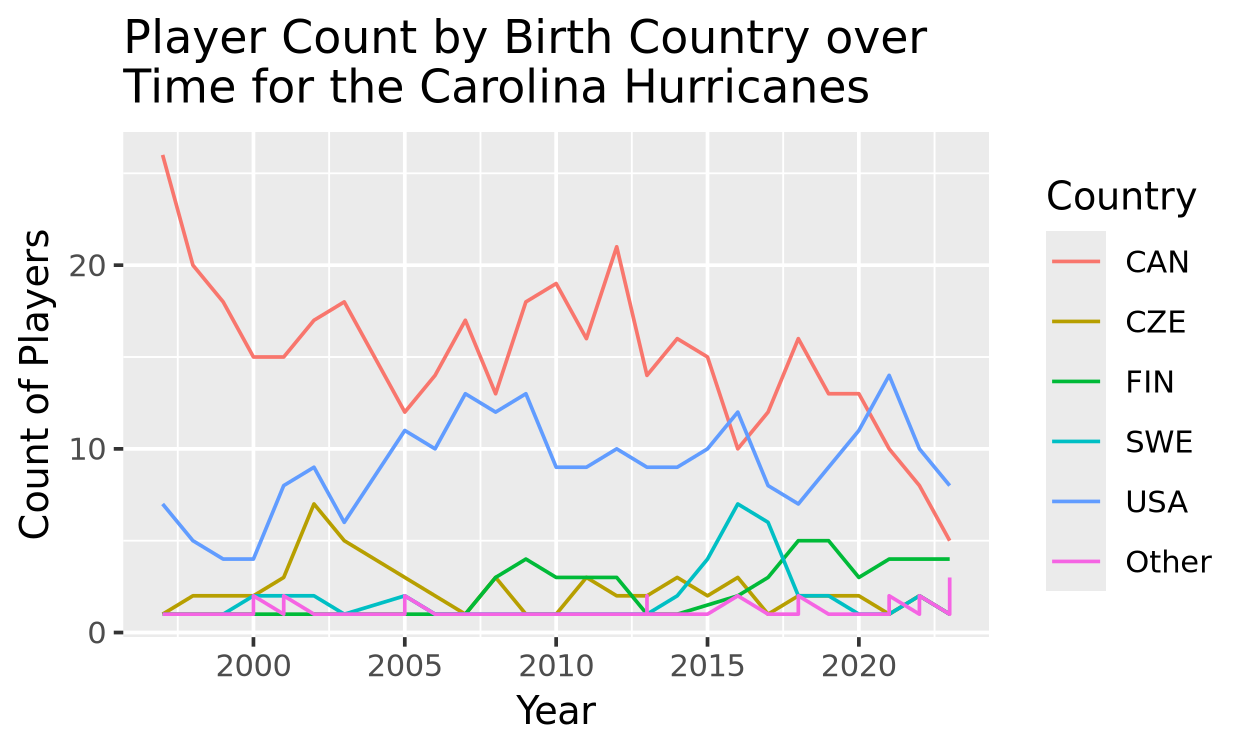

In [16]:
nhl_roster |> filter(team_code == "CAR") |> 
    group_by(season, birth_country) |> count() |>  ungroup() |>
    mutate(country_lumped = birth_country |> fct_lump(n = 5)) |> mutate(year = str_extract(season, "\\d{4}")) |> 
    mutate(year = as.numeric(year)) |> ggplot(aes(x=year, y=n, color=country_lumped)) + geom_line() +
    labs(x= "Year",y= "Count of Players", color= "Country") + ggtitle("Player Count by Birth Country over \nTime for the Carolina Hurricanes")

For the final visualization, I wanted to examine the count of players from the five most common birth countries over time for the Carolina Hurricanes. I was interested in seeing if the number of players from certain countries changed significantly over the past 20+ years. I first filtered the data to only include players from the Carolina Hurricanes, then grouped the data by season and birth country to count the occurrences. After ungrouping the data to avoid potential anomalies, I used the forcats package to keep the five most frequent birth countries and grouped the rest of the countries under the "Other" label. After referencing Stack Overflow, I extracted the first year from each season to create a new "Year" column. This was done to make the chart  more readable by using '1999' instead of '19992000' on the x-axis, for example. I used a line graph to plot the data, with each line representing a different country and colored according to the legend. Lastly, I renamed the legend title and added titles for the axes and overall line graph. The number of players born in Canada has decreased over time, from more than 20 players around 1997 to about 5 during the 2023-2024 season. In contrast, the number of players born in the USA increased overall, but has decreased in recent years, settling at around the original number of between 5 and 10 players. The number of players from other countries, including Finland and Sweden, has increased over time, reflecting a growing influx of players from abroad.